In [7]:
import numpy as np

def update_car(position, yaw, velocity, steering_angle, dt):
    position[0] += velocity * np.cos(yaw) * dt
    position[1] += velocity * np.sin(yaw) * dt
    yaw += (velocity / 4) * np.tan(steering_angle) * dt
    return position, yaw

In [12]:
position = [0, 0]
yaw = 0
dt = 0.1

new_position, new_yaw = update_car(position, yaw, 1, np.deg2rad(60), dt)

print("New position: ({:.2f}, {:.2f})".format(new_position[0], new_position[1]))
print("New yaw: {:.2f}".format(new_yaw))

New position: (0.10, 0.00)
New yaw: 0.04


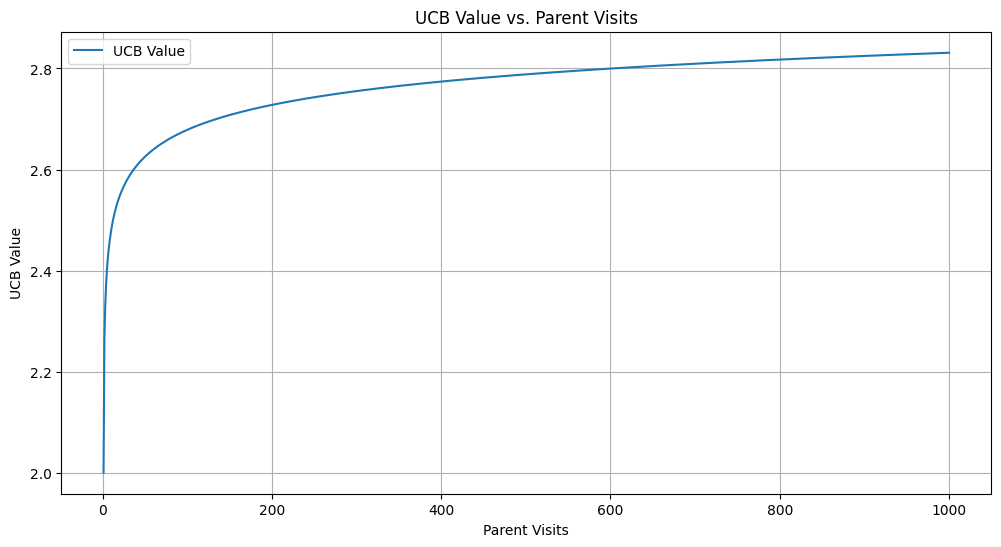

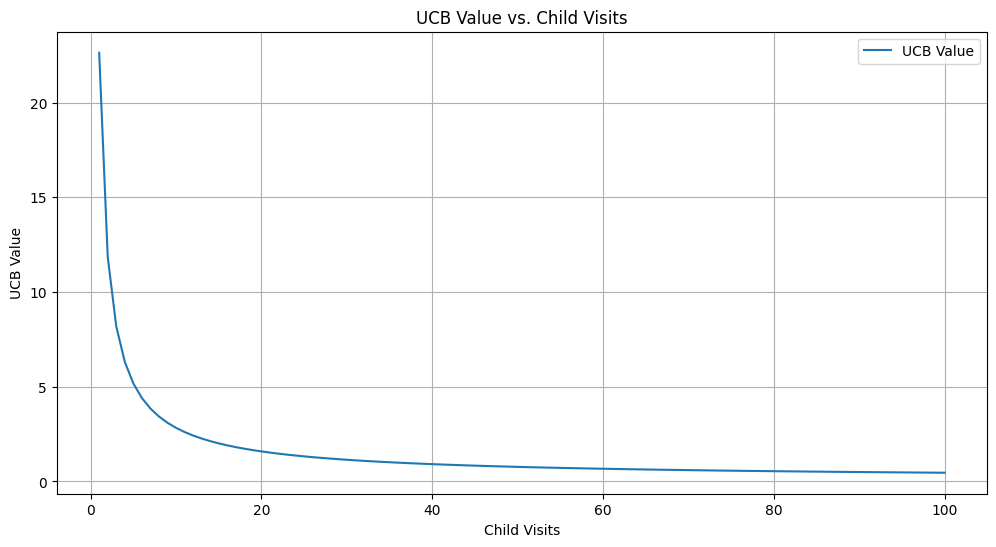

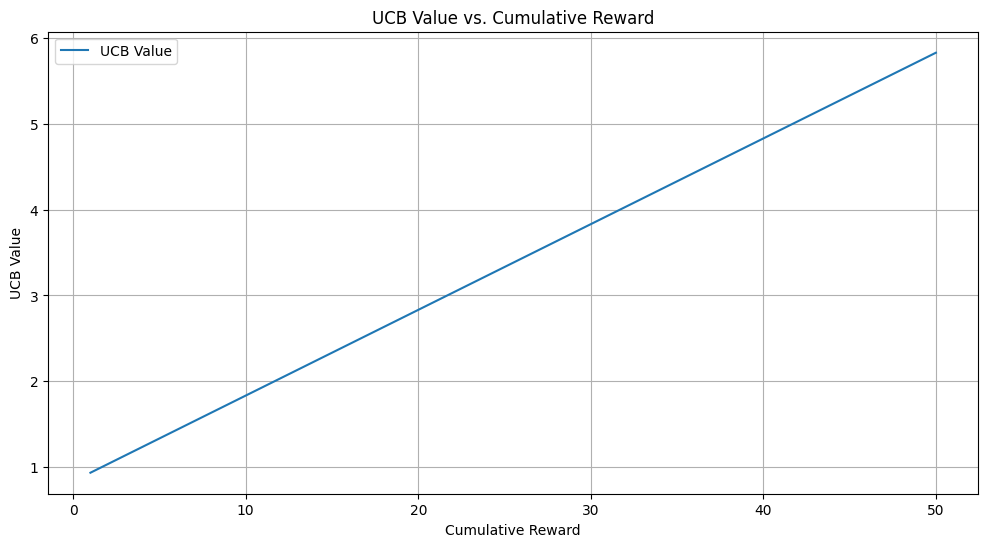

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def ucb(cumulative_reward, child_visits, parent_visits, K=1):
    if child_visits == 0:
        return float('inf')
    return (cumulative_reward / child_visits) + K * np.sqrt(np.log(parent_visits) / child_visits)

# Parameters
K = 1
child_visits_fixed = 10
parent_visits_range = np.arange(1, 1001)
cumulative_reward_fixed = 20

# Plot 1: Varying Parent Visits
ucb_values_parent = [ucb(cumulative_reward_fixed, child_visits_fixed, v, K) for v in parent_visits_range]

plt.figure(figsize=(12, 6))
plt.plot(parent_visits_range, ucb_values_parent, label='UCB Value')
plt.xlabel('Parent Visits')
plt.ylabel('UCB Value')
plt.title('UCB Value vs. Parent Visits')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Varying Child Visits
child_visits_range = np.arange(1, 101)
ucb_values_child = [ucb(cumulative_reward_fixed, v, 1000, K) for v in child_visits_range]

plt.figure(figsize=(12, 6))
plt.plot(child_visits_range, ucb_values_child, label='UCB Value')
plt.xlabel('Child Visits')
plt.ylabel('UCB Value')
plt.title('UCB Value vs. Child Visits')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Varying Cumulative Reward
cumulative_reward_range = np.arange(1, 51)
ucb_values_reward = [ucb(v, 10, 1000, K) for v in cumulative_reward_range]

plt.figure(figsize=(12, 6))
plt.plot(cumulative_reward_range, ucb_values_reward, label='UCB Value')
plt.xlabel('Cumulative Reward')
plt.ylabel('UCB Value')
plt.title('UCB Value vs. Cumulative Reward')
plt.legend()
plt.grid(True)
plt.show()
